In [1]:

from jqdata import finance
import datetime
q_index= query(finance.FUND_NET_VALUE).filter(finance.FUND_NET_VALUE.code=="510300").order_by(finance.FUND_NET_VALUE.day.desc()).limit(3000)
df_index = finance.run_query(q_index)
q=query(finance.FUND_NET_VALUE).filter(finance.FUND_NET_VALUE.code=="163407").order_by(finance.FUND_NET_VALUE.day.desc()).limit(len(df_index))
df_enhanced=finance.run_query(q)

df_merge = df_index[['day','sum_value']]
df_merge.columns = ['date','index_fund']
df_merge['enhanced_fund'] = df_enhanced['sum_value']
print(df_merge)

you must config OPTION_SERVERS for jqdata
you must config FUNDAMENTALS_SERVERS for jqdata


NameError: name 'query' is not defined

In [8]:
df_merge = df_merge.sort_values(by='date')
df_merge = df_merge.set_index('date')
print(df_merge)

            index_fund  enhanced_fund
date                                 
2012-05-04      1.0070         0.8521
2012-05-11      0.9780         0.8453
2012-05-18      0.9550         0.8393
2012-05-25      0.9550         0.8516
2012-05-28      0.9700         0.8611
2012-05-29      0.9840         0.8569
2012-05-30      0.9800         0.8539
2012-05-31      0.9770         0.8534
2012-06-01      0.9780         0.8308
2012-06-04      0.9510         0.8315
2012-06-05      0.9510         0.8319
2012-06-06      0.9500         0.8274
2012-06-07      0.9460         0.8208
2012-06-08      0.9400         0.8316
2012-06-11      0.9530         0.8257
2012-06-12      0.9460         0.8384
2012-06-13      0.9620         0.8322
2012-06-14      0.9550         0.8356
2012-06-15      0.9580         0.8400
2012-06-18      0.9630         0.8359
2012-06-19      0.9550         0.8347
2012-06-20      0.9530         0.8224
2012-06-21      0.9390         0.8065
2012-06-25      0.9190         0.8075
2012-06-26  

In [11]:
#份额
num_index = 0
num_enhanced = 0
#份额数组
num_index_arr = []
num_enhanced_arr = []
#总收益
tp_index = []
tp_enhanced = []
#费率
ex_index = 0.0015
#定投次数h和金额
m=0
mon = 100
#定投数组
buy_arr = []
for i in range(len(df_merge)):
    if i == 0:
        m+=1
        num_index += (1-ex_index)*100/df_merge['index_fund'].values[i] #沪深300 份额
        num_enhanced += (1-ex_index)*100/df_merge['enhanced_fund'].values[i] #增强沪深300 份额
        tp_index.append(num_index*df_merge['index_fund'].values[i]-m*mon)  #沪深300 收益数组添加收益
        tp_enhanced.append(num_enhanced*df_merge['enhanced_fund'].values[i]-m*mon) #增强沪深300 收益数组添加收益
        num_index_arr.append(num_index)        
        num_enhanced_arr.append(num_enhanced)
        #columns = [u'时间', u'定投金额', u'沪深300份额', u'沪深300基金净值', u'沪深300增强份额',u'沪深300净值',]
        buy_arr.append([df_merge.index[i], m, num_index, df_merge['index_fund'].values[i], df_merge['enhanced_fund'].values[i], num_enhanced])
        continue
    elif df_merge.index[i].split('-')[1] !=df_merge.index[i-1].split('-')[1]:
        m+=1
        num_index += (1-ex_index)*100/df_merge['index_fund'].values[i]
        num_enhanced += (1-ex_index)*100/df_merge['enhanced_fund'].values[i]
        tp_index.append(num_index*df_merge['index_fund'].values[i]-m*mon)
        tp_enhanced.append(num_enhanced*df_merge['enhanced_fund'].values[i]-m*mon)
        num_index_arr.append(num_index)        
        num_enhanced_arr.append(num_enhanced)
        buy_arr.append([df_merge.index[i], m, num_index, df_merge['index_fund'].values[i], df_merge['enhanced_fund'].values[i], num_enhanced])
        continue
    else :
        tp_index.append(num_index*df_merge['index_fund'].values[i]-m*mon)
        tp_enhanced.append(num_enhanced*df_merge['enhanced_fund'].values[i]-m*mon)
        num_index_arr.append(num_index)        
        num_enhanced_arr.append(num_enhanced)
df_merge['tp_index'] = tp_index
df_merge['tp_enhanced'] = tp_enhanced


In [12]:
print(df_merge.columns)
#修改后面两列的名字
df_merge.columns =['index_fund','enhanced_fund',u'定投沪深300ETF累计损益',u'定投沪深300指数增强累计损益']
print(df_merge.columns)

Index(['index_fund', 'enhanced_fund', 'tp_index', 'tp_enhanced'], dtype='object')
Index(['index_fund', 'enhanced_fund', '定投沪深300ETF累计损益', '定投沪深300指数增强累计损益'], dtype='object')


In [13]:
df_merge['损益差'] = df_merge['定投沪深300指数增强累计损益']-df_merge['定投沪深300ETF累计损益']

            定投沪深300ETF累计损益  定投沪深300指数增强累计损益          损益差
date                                                    
2012-05-04       -0.150000        -0.150000     0.000000
2012-05-11       -3.025521        -0.946831     2.078690
2012-05-18       -5.306107        -1.649918     3.656189
2012-05-25       -5.306107        -0.208591     5.097517
2012-05-28       -3.818769         0.904630     4.723398
2012-05-29       -2.430586         0.412469     2.843055
2012-05-30       -2.827210         0.060926     2.888135
2012-05-31       -3.124677         0.002335     3.127013
2012-06-01       -3.175521        -2.795957     0.379564
2012-06-04       -8.609326        -2.629801     5.979525
2012-06-05       -8.609326        -2.534854     6.074472
2012-06-06       -8.810578        -3.603003     5.207575
2012-06-07       -9.615586        -5.169622     4.445965
2012-06-08      -10.823098        -2.606064     8.217034
2012-06-11       -8.206822        -4.006526     4.200296
2012-06-12       -9.615586     

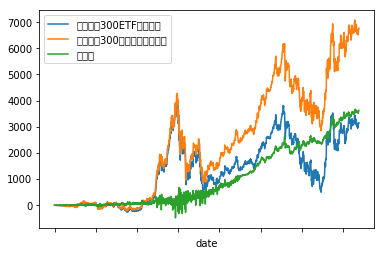

In [60]:
df_merge[['定投沪深300ETF累计损益','定投沪深300指数增强累计损益','损益差']].plot()
print(df_merge[['定投沪深300ETF累计损益','定投沪深300指数增强累计损益','损益差']])

In [14]:
import time  # 引入time模块
df_merge['num_index_arr'] = num_index_arr
df_merge['num_enhanced_arr'] = num_enhanced_arr

ticks = str(time.time())
df_merge.to_csv('C:/data/' + ticks + '.csv', encoding='utf_8_sig')


In [18]:
# 收益数据
import pandas as pd
import numpy as np

buy_cols = [u'时间', u'定投金额', u'沪深300份额', u'沪深300基金净值', u'沪深300增强份额',u'沪深300净值']
df_buy = pd.DataFrame(data=buy_arr, columns=buy_cols)
ticks = str(time.time())
df_buy.to_csv('C:/data/收益' + ticks + '.csv', encoding='utf_8_sig')


data = []
data.append([ df_merge.index[0], df_merge.index[len(df_merge.index)-1], mon, m, num_index,df_merge.index_fund[len(df_merge.index)-1]])
data.append([ df_merge.index[0], df_merge.index[len(df_merge.index)-1], mon, m, num_enhanced,df_merge.enhanced_fund[len(df_merge.index)-1]])
columns = [u'开始时间', u'结束时间',u'月定投金额',u'总定投数', u'份额', u'基金净值']
df_state = pd.DataFrame(data=data, index=['510300','163407'], columns=columns)
df_state['本金'] = df_state['月定投金额']*df_state['总定投数']
df_state['持仓金额'] = df_state['份额']*df_state['基金净值']
#定投的数组
monArr = np.array([mon]*m)
#https://blog.csdn.net/huiguixian/article/details/90714331
arr = []
arr.append(np.append(monArr, df_state['持仓金额'][0]*-1))
arr.append(np.append(monArr, df_state['持仓金额'][1]*-1))
#年化收益率 采用IRR
profit = []
profit.append(pow(np.irr(arr[0])+1, m)-1)
profit.append(pow(np.irr(arr[1])+1, m)-1)
df_state['年化收益率'] = profit
print(profit)
df_state

    


[0.7361077583480031, 1.7356011948744614]


,开始时间,结束时间,月定投金额,总定投数,份额,基金净值,本金,持仓金额,年化收益率
510300,2012-05-04,2019-12-12,100,92,7759.758407,1.5868,9200,12313.184640,0.736108
163407,2012-05-04,2019-12-12,100,92,7852.387597,2.0317,9200,15953.695881,1.735601


In [28]:
from datetime import date
#计算年华收益
def xirr(transactions):

    '''
    Calculates the Internal Rate of Return (IRR) for an irregular series of cash flows (XIRR)
    Takes a list of tuples [(date,cash-flow),(date,cash-flow),...]
    Returns a rate of return as a percentage
    '''

    years = [(ta[0] - transactions[0][0]).days / 365. for ta in transactions]
    residual = 1.0
    step = 0.05
    guess = 0.05
    epsilon = 0.0001
    limit = 10000
    while abs(residual) > epsilon and limit > 0:
        limit -= 1
        residual = 0.0
        for i, trans in enumerate(transactions):
            residual += trans[1] / pow(guess, years[i])
        if abs(residual) > epsilon:
            if residual > 0:
                guess += step
            else:
                guess -= step
                step /= 2.0
    return guess - 1
tas_index = []
tas_enhanced = []
for i in range(len(df_buy)):
    d = df_buy['时间'][i].split('-')
    tas_index.append((date(int(d[0]), int(d[1]), int(d[2])),-100 ))
    tas_enhanced.append((date(int(d[0]), int(d[1]), int(d[2])),-100 ))
tas_index.append((date(2019, 12,13), df_state['持仓金额'][0])) 
tas_enhanced.append((date(2019, 12,13), df_state['持仓金额'][1])) 
print("沪深300 = {:.2%}".format(xirr(tas_index)))
print("沪深300增强 = {:.2%}".format(xirr(tas_enhanced)))

沪深300 = 7.56%
沪深300增强 = 14.20%
